# Метод градиентного спуска

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

## 1. Linear regression

### Данные

In [2]:
l = 1000
x =  np.arange(l)/l
y = 10*x + np.random.standard_normal(l)

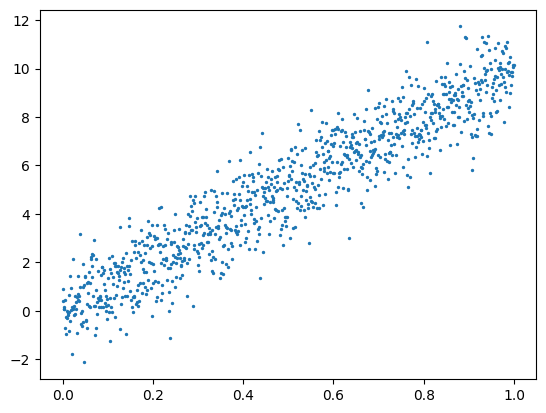

In [3]:
plt.scatter(x,y,s=2)
plt.show()

## 1. Linear regression

In [4]:
def grad(theta: np.array, x: np.array, y: np.array) -> np.array:
    l = len(x)
    return np.array((
                    -1/l*np.sum([y[i]-theta[0]-theta[1]*x[i] for i in range(l)]),
                    -1/l*np.sum(([(y[i]-theta[0]-theta[1]*x[i])*x[i] for i in range(l)]))))

In [5]:
def gradient_descent(x: np.array, y: np.array, *,
                     theta_0=np.array((0,0)),
                     nu=0.1,
                     n=1000,
                     eps=10**-5) -> np.array:
    i = 0
    prev = theta_0 + 1000
    theta = theta_0
    while i < n or np.linalg.norm(theta - prev) <= eps:
        prev = theta
        theta = theta - nu * grad(theta, x, y)
        i += 1
    return theta

In [6]:
theta = gradient_descent(x, y)

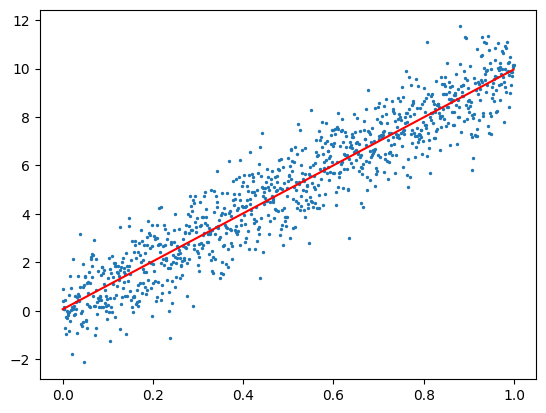

In [7]:
plt.plot(x, theta[0]+theta[1]*x, c='r')
plt.scatter(x,y,s=2)
plt.show()

In [8]:
theta

array([0.0573695 , 9.91509128])

In [9]:
def grad_correct(x, y, theta):
    """
    x : np.array (l x m)
    y : np.array (l x 1)
    theta : np.array (m x 1)
    
    """
    l = len(y)
    yhat = np.dot(x, theta)
    return (-1/l) * np.dot(np.transpose(x), y - yhat) # m X 1

## 2. Logistic regression

### Данные

In [10]:
x = np.random.uniform(-1,1,size=(1000,2))
y = -0.5 * x[:, 0] < 2 * x[:, 1]

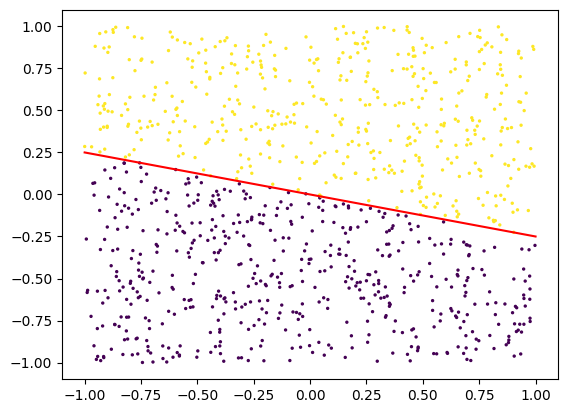

In [11]:
plt.scatter(x[:, 0], x[:, 1], s=2, c=y)
plt.plot(np.linspace(-1,1,1000), -(0.5/2)*np.linspace(-1,1,1000), c='r')
plt.show()

In [12]:
def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def grad(x, y, theta):
    l = len(x)
    yhat = np.dot(x, theta)
    return (-1/l) * np.dot(np.transpose(x), y - logistic_sigmoid(yhat))

In [14]:
def grad_descent(x, y, n = 1000, eta = 0.1, tol = 0.00001):
    x = np.c_[x,np.ones(x.shape[0])]
    theta_init = np.zeros(x.shape[1])
    theta_cur = theta_init + 100
    for i in range(n):
        theta_cur = theta_init - eta * grad(x, y, theta_init)
        if np.linalg.norm(theta_cur - theta_init) < tol:
            return theta_init
        else:
            theta_init = theta_cur
    return theta_init

In [15]:
theta = grad_descent(x, y)
theta

array([ 1.35513997,  5.70806983, -0.12133448])

In [16]:
y_new = logistic_sigmoid(np.dot(np.c_[x,np.ones(x.shape[0])], theta))

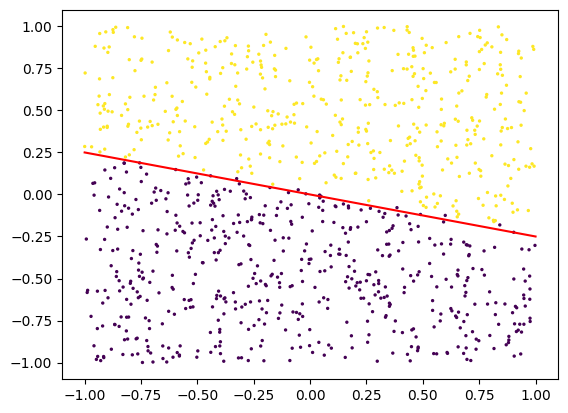

In [17]:
plt.scatter(x[:, 0], x[:, 1], s=2, c=(y_new > 0.5))
plt.plot(np.linspace(-1,1,1000), -(0.5/2)*np.linspace(-1,1,1000), c='r')
plt.show()

## 3. Метод стохастического градиентного спуска

In [21]:
l = 1000
x =  np.arange(l)/l
y = 10*x + np.random.standard_normal(l)

In [22]:
def random_grad_descent(x, y, n = 1000, batch_size = 10, eta = 0.1, tol = 0.00001):
    x = np.c_[x,np.ones(x.shape[0])]
    theta_init = np.zeros(x.shape[1])
    theta_cur = theta_init + 100
    l = len(x)
    Q = []
    for i in range(n):
        rand = np.random.randint(x.shape[0], size=batch_size)
        theta_cur = theta_init - eta * grad_correct(x[rand], y[rand], theta_init)
        if np.linalg.norm(theta_cur - theta_init) < tol:
            return theta_init
        else:
            theta_init = theta_cur
        Q.append((1/(2*l))*sum((y[i] - theta_cur[1] - theta_cur[0]*x[i, 0])**2 for i in range(l)))
    return theta_init, Q

In [23]:
theta, Q = random_grad_descent(x, y)
theta

array([ 9.98069233, -0.06877472])

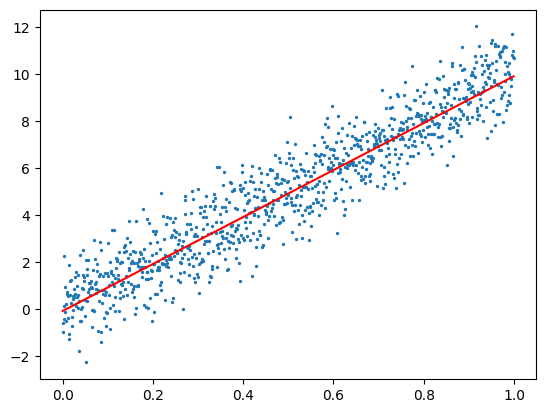

In [24]:
plt.plot(x, theta[1]+theta[0]*x, c='r')
plt.scatter(x,y,s=2)
plt.show()

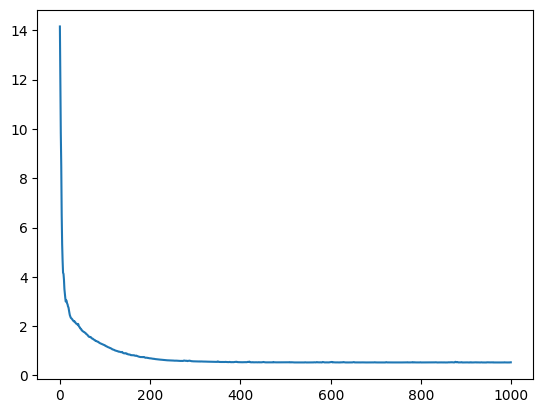

In [25]:
plt.plot(Q)
plt.show()